#

# Análisis de FIFA 2023
## Resumen
##### El presente trabajo tiene como objetivo analizar el dataset oficial de jugadores del videojuego FIFA 2023, con el propósito de evaluar el desempeño y potencial futbolístico de las distintas selecciones nacionales, especialmente Argentina, actual campeona del mundo. A través de técnicas básicas de análisis de datos y visualización, se busca identificar patrones, relaciones y comparaciones significativas entre países, posiciones y atributos de los jugadores.

##### En una primera instancia, se realizó la limpieza y organización del dataset, eliminando valores nulos y seleccionando únicamente las columnas más relevantes: nombre, edad, nacionalidad, posición, club, valoración general (Overall), potencial, altura, peso, cláusula de rescisión y número de camiseta. Posteriormente, se ordenaron los datos en función del Overall y del valor de rescisión, permitiendo identificar rápidamente a los jugadores más destacados del mundo.

##### Mediante el uso de visualizaciones con Seaborn y Matplotlib, se analizaron las distribuciones de puntajes (Overall), observando la concentración de la mayoría de los futbolistas en niveles medios de rendimiento, y destacando un pequeño grupo de élite con valores sobresalientes. También se exploraron las relaciones entre variables clave: se comprobó una correlación positiva entre el Overall y la cláusula de rescisión, lo que refleja cómo los jugadores con mejor rendimiento poseen contratos de mayor valor económico. En cambio, la relación entre edad y rendimiento resultó débil, sugiriendo que la valoración no depende directamente de la edad, sino de otros factores como la experiencia, posición o club.

##### Posteriormente, se elaboró un análisis comparativo entre países, tomando los 30 mejores jugadores de cada nacionalidad para calcular su promedio de Overall. Con esto se determinaron los TOP 10 países con mayor potencial futbolístico, destacando a selecciones como Francia, Argentina, Portugal, Brasil e Inglaterra. Estos resultados se visualizaron mediante gráficos de barras y distribuciones tipo FacetGrid, donde se observó la dispersión y consistencia del nivel de los jugadores por nación.

###### En conjunto, el trabajo logró integrar de forma efectiva el uso de pandas, seaborn y matplotlib para generar una visión analítica del rendimiento futbolístico internacional. Los resultados permiten no solo confirmar el alto nivel de Argentina y otras potencias, sino también evidenciar la utilidad del análisis de datos en contextos deportivos, contribuyendo al entendimiento del rendimiento y valor de los jugadores a escala global.

In [58]:
#Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
sns.set_style('darkgrid')

In [59]:
# Install gdown to download the file directly from Google Drive
!pip install gdown -q

import gdown
import pandas as pd

# Extract file ID from the provided link
file_id = '1K6xU4TFVzwdonqopudBXbj2Hbem1IvyH'
output_filename = 'CLEAN_FIFA23_official_data.csv' # Use the desired local filename

# Download the file
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_filename, quiet=False)

# Read the downloaded CSV into a DataFrame
df = pd.read_csv(output_filename, low_memory=False)
df = df [['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Position', 'Height(cm.)', 'Weight(lbs.)', 'Release Clause(£)', 'Kit Number']]
df.head()

Downloading...
From: https://drive.google.com/uc?id=1K6xU4TFVzwdonqopudBXbj2Hbem1IvyH
To: /content/CLEAN_FIFA23_official_data.csv
100%|██████████| 5.70M/5.70M [00:00<00:00, 241MB/s]


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Position,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,SUB,189.0,180.810,157000000.0,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,LCM,179.0,152.145,155000000.0,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,LB,172.0,152.145,97700000.0,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,RCM,181.0,154.350,198900000.0,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,RCM,172.0,149.940,154400000.0,23.0


In [60]:
# @title
#Borramos los nulos
df.dropna(inplace=True)

In [61]:
# @title
#Ordenamos las tablas según Overall, Release Clause
df.sort_values(by=['Overall', 'Release Clause(£)'], ascending=False, inplace=True)

### 1. Distribuciones de puntaje de jugadores

##### A continuación se muestra la distribución de los jugadores según su Overall.

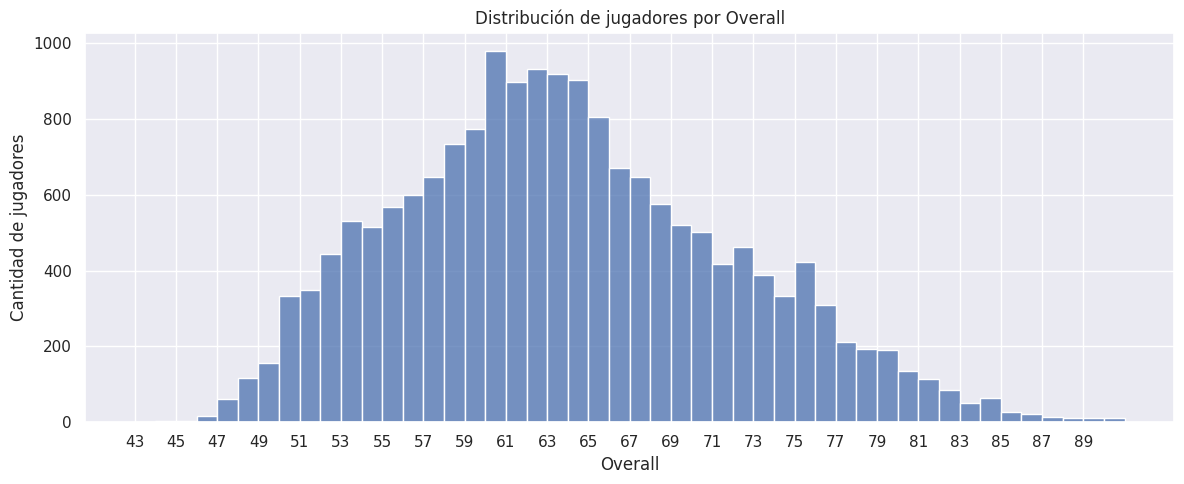

In [62]:
# @title
#Definimos el parámetro en base al cual definimos los mejores jugadores
#La distribución del Overall de los jugadores es como sigue:
fig, ax = plt.subplots(figsize=(12,5), tight_layout=True) #Definición de tamaño, retiro de espacios "muertos"
sns.histplot(df, x='Overall', binwidth=1) #Gráfico
bins = np.arange(df['Overall'].min(),df['Overall'].max(), 2) #Valores de Overall de uno en uno
plt.xticks(bins)
plt.title('Distribución de jugadores por Overall')
plt.xlabel('Overall')
plt.ylabel('Cantidad de jugadores')
plt.show()

### 2. Dream Team Jugadores FIFA 2023

##### Se busca en este caso definir un solo jugador (el mejor) por cada posición posible. Además se muestran los mejores jugadores del mundo según el Overall.

In [63]:
# @title
df.drop_duplicates('Position')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Position,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number
75,231747,K. Mbappé,23,https://cdn.sofifa.net/players/231/747/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,95,Paris Saint-Germain,ST,182.0,160.965,366700000.0,7.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,RCM,181.0,154.350,198900000.0,17.0
124,165153,K. Benzema,34,https://cdn.sofifa.net/players/165/153/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,91,91,Real Madrid CF,CF,185.0,178.605,131200000.0,9.0
56,158023,L. Messi,35,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,91,91,Paris Saint-Germain,RW,169.0,147.735,99900000.0,30.0
14357,192119,T. Courtois,30,https://cdn.sofifa.net/players/192/119/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,90,91,Real Madrid CF,GK,199.0,211.680,191300000.0,1.0
192,203376,V. van Dijk,30,https://cdn.sofifa.net/players/203/376/23_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,90,90,Liverpool,LCB,193.0,202.860,181300000.0,4.0
135,200104,H. Son,29,https://cdn.sofifa.net/players/200/104/23_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,89,89,Tottenham Hotspur,LW,183.0,171.990,191900000.0,7.0
5,212622,J. Kimmich,27,https://cdn.sofifa.net/players/212/622/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,89,90,FC Bayern München,RDM,177.0,165.375,182000000.0,6.0
37,200145,Casemiro,30,https://cdn.sofifa.net/players/200/145/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,89,89,Real Madrid CF,CDM,185.0,185.220,176300000.0,14.0
1767,239818,Rúben Dias,25,https://cdn.sofifa.net/players/239/818/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,88,91,Manchester City,RCB,187.0,180.810,206900000.0,3.0


/tmp/ipython-input-688824330.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='Overall', y='Name', palette='crest', width=0.5)


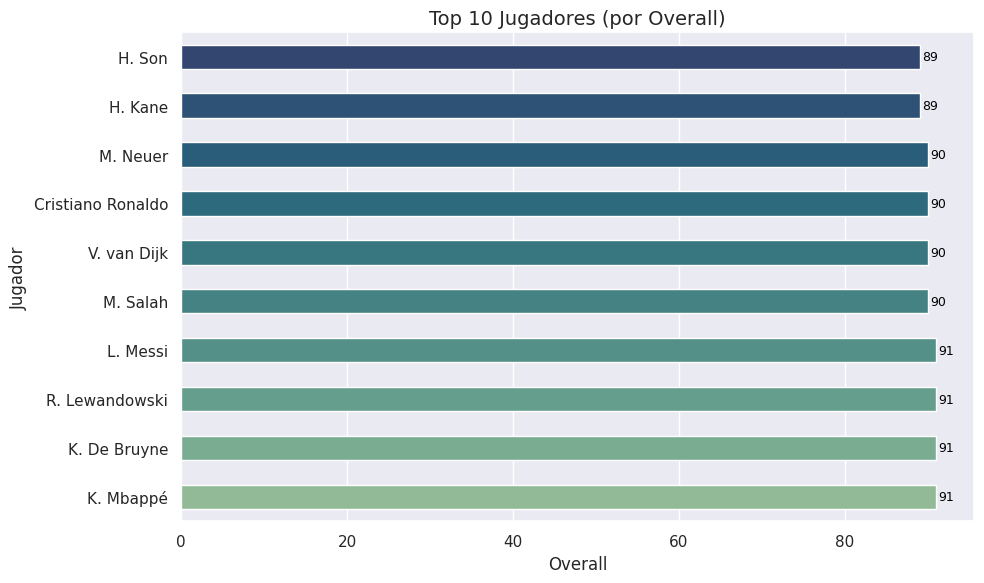

In [64]:
# Copiamos el DataFrame original
df_best_player = df.copy()

# Eliminamos duplicados por nacionalidad
df_best_player = df_best_player.drop_duplicates('Nationality').reset_index(drop=True)

# Ordenamos de mayor a menor según "Overall"
df_best_player = df_best_player.sort_values(by='Overall', ascending=False)

# Tomamos los 10 mejores jugadores
df_top10 = df_best_player.head(10)

# Graficamos
fig, ax = plt.subplots(figsize=(10,6), tight_layout=True)
sns.barplot(data=df_top10, x='Overall', y='Name', palette='crest', width=0.5)

# Invertir el eje Y para que el mejor esté arriba
ax.invert_yaxis()

# Agregar los valores de "Overall" al final de cada barra
for i, (value, name) in enumerate(zip(df_top10['Overall'], df_top10['Name'])):
    ax.text(value + 0.3, i, f'{value}', va='center', fontsize=9, color='black')

# Título y etiquetas
plt.title('Top 10 Jugadores (por Overall)', fontsize=14)
plt.xlabel('Overall')
plt.ylabel('Jugador')

plt.show()




/tmp/ipython-input-2155064815.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="MainRole", y="Overall", palette="viridis")


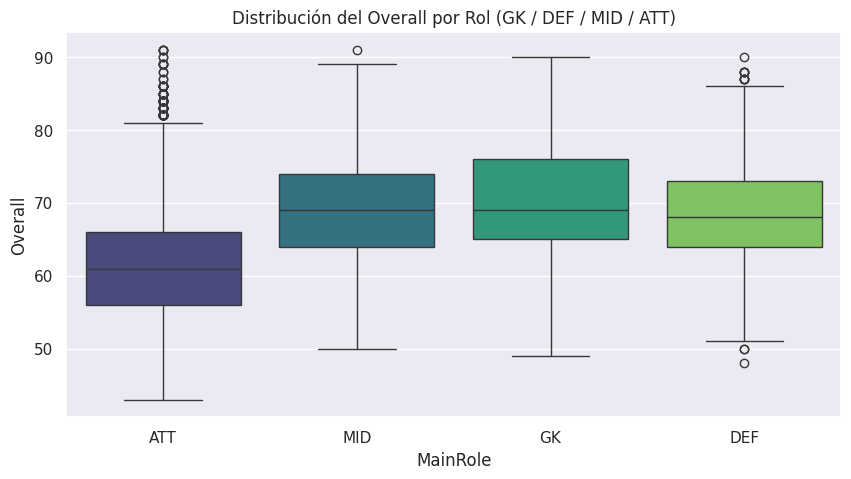

In [65]:
# --- Clasificación general de posiciones ---
def map_position(pos):
    if "GK" in pos:
        return "GK"
    elif any(x in pos for x in ["CB", "LB", "RB", "LWB", "RWB"]):
        return "DEF"
    elif any(x in pos for x in ["CM", "CDM", "CAM", "LM", "RM"]):
        return "MID"
    else:
        return "ATT"

df["MainRole"] = df["Position"].apply(map_position)

# --- Distribución del Overall por rol ---
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="MainRole", y="Overall", palette="viridis")
plt.title("Distribución del Overall por Rol (GK / DEF / MID / ATT)")
plt.show()


In [66]:
# --- Dream Team por posición ---
df_dream = (
    df.sort_values("Overall", ascending=False)
      .groupby("Position")           # 1 jugador por posición exacta
      .head(1)
      .sort_values("Overall", ascending=False)
)

df_dream[["Name","Position","Nationality","Club","Overall"]]


,Name,Position,Nationality,Club,Overall
56,L. Messi,RW,Argentina,Paris Saint-Germain,91
75,K. Mbappé,ST,France,Paris Saint-Germain,91
124,K. Benzema,CF,France,Real Madrid CF,91
3,K. De Bruyne,RCM,Belgium,Manchester City,91
192,V. van Dijk,LCB,Netherlands,Liverpool,90
14357,T. Courtois,GK,Belgium,Real Madrid CF,90
135,H. Son,LW,Korea Republic,Tottenham Hotspur,89
5,J. Kimmich,RDM,Germany,FC Bayern München,89
37,Casemiro,CDM,Brazil,Real Madrid CF,89
9,João Cancelo,LB,Portugal,Manchester City,88


/tmp/ipython-input-1058528089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=club_avg.values, y=club_avg.index, palette="mako")


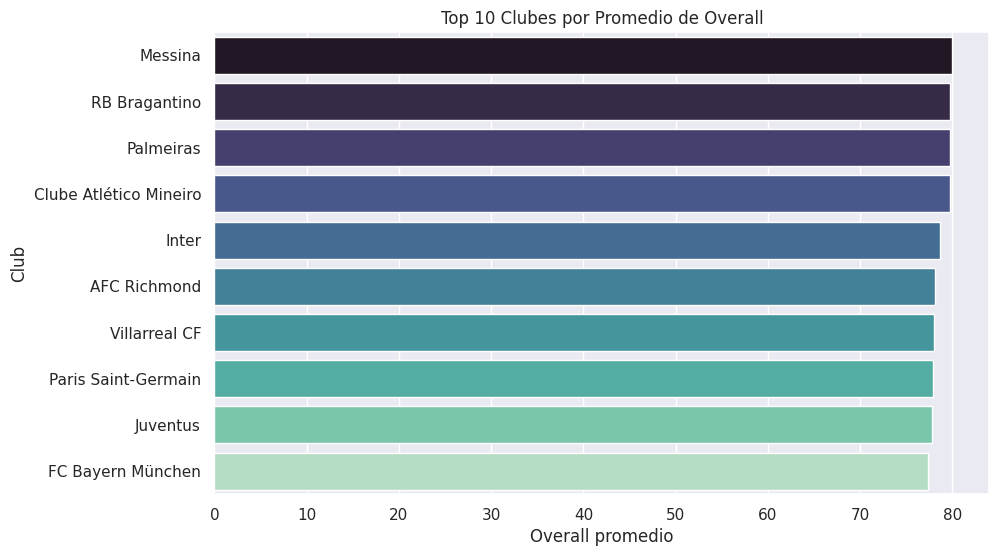

In [67]:
# TOP CLUBES POR OVERALL
club_avg = (
    df.groupby("Club")["Overall"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=club_avg.values, y=club_avg.index, palette="mako")
plt.title("Top 10 Clubes por Promedio de Overall")
plt.xlabel("Overall promedio")
plt.show()


#### Es de interés observar cómo la relación entre Overall y la cláusula de recisión están relacionadas de manera muy directa. Se muestran a continuación dos estimaciones con curvas lineales y parabólicas. En este caso puede observarse que mientras mayor Overall, mayor es la cláusula de recisión en general.

/tmp/ipython-input-1055881562.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-1055881562.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


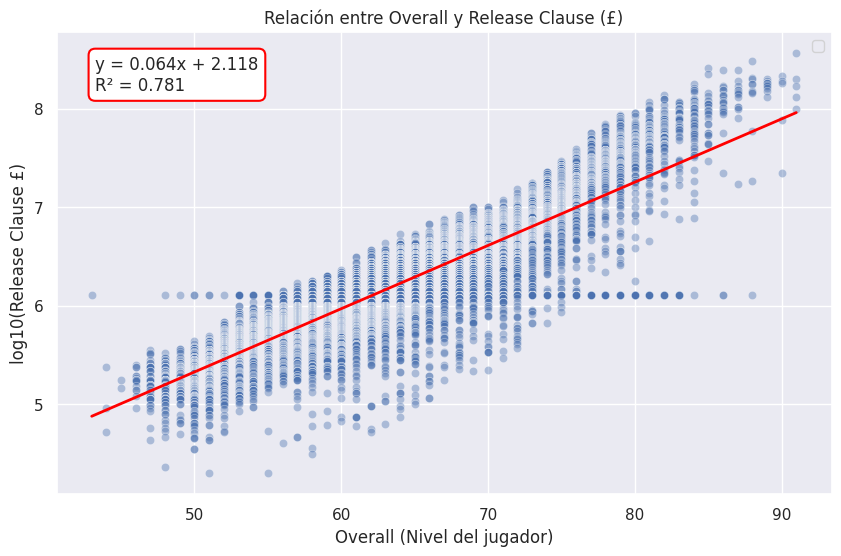

In [68]:
# Se contempla realizar una línea de tendencia, en este caso es conveniente que el eje Y se contemple con escala logarítmica. En primera instancia se plantea una línea de tendencia LINEAL.
# Variables
X = df[['Overall']]
y = df['Release Clause(£)']

# Escala logarítmica en Y (para reducir dispersión)
y_log = np.log10(y)

# Modelo lineal
model = LinearRegression()
model.fit(X, y_log)
y_pred = model.predict(X)

# Coeficientes
a = model.coef_[0]
b = model.intercept_
r2 = r2_score(y_log, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Overall'], y=y_log, alpha=0.4)
plt.plot(df['Overall'], y_pred, color='red', linewidth=2)
plt.legend()

# Ecuación y R2
eq_text = f"y = {a:.3f}x + {b:.3f}\nR² = {r2:.3f}"
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="red", lw=1.5))

plt.title('Relación entre Overall y Release Clause (£)')
plt.xlabel('Overall (Nivel del jugador)')
plt.ylabel('log10(Release Clause £)')
plt.legend()
plt.show()

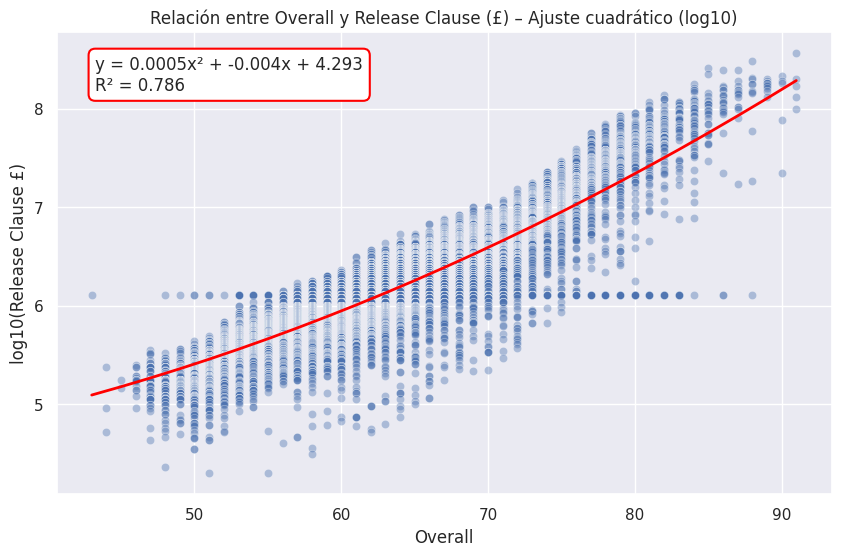

In [69]:
# Para mejorar el R2 se busca una aproximación cuadrática.
# Polinómico de grado 2 sobre log10(Release Clause)
X = df[['Overall']]
y = np.log10(df['Release Clause(£)'])

# Generar términos polinómicos
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Ajustar modelo
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred = model_poly.predict(X_poly)

# Coeficientes
a2, a1, a0 = model_poly.coef_[2], model_poly.coef_[1], model_poly.intercept_
r2_poly = r2_score(y, y_pred)

# Graficar
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Overall'], y=y, alpha=0.4)
plt.plot(np.sort(df['Overall']), np.sort(y_pred), color='red', linewidth=2)

eq_text = f"y = {a2:.4f}x² + {a1:.3f}x + {a0:.3f}\nR² = {r2_poly:.3f}"
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='red', lw=1.5))

plt.title('Relación entre Overall y Release Clause (£) – Ajuste cuadrático (log10)')
plt.xlabel('Overall')
plt.ylabel('log10(Release Clause £)')
plt.show()


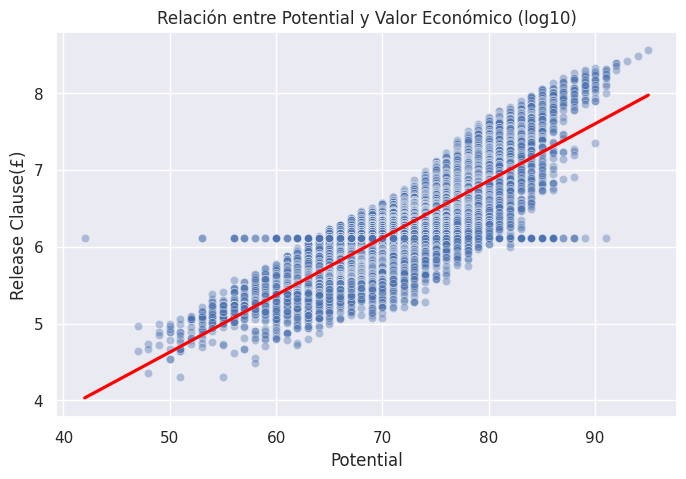

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Potential", y=np.log10(df["Release Clause(£)"]), alpha=0.4)
sns.regplot(data=df, x="Potential", y=np.log10(df["Release Clause(£)"]),
            scatter=False, color="red")
plt.title("Relación entre Potential y Valor Económico (log10)")
plt.show()


#### Asimismo, es de interés observar si existe alguna correlación entre la Edad del jugador y el Overall correspondiente. En este caso la correlación es muy baja, con lo cual no se puede determinar con certeza la tendencia.

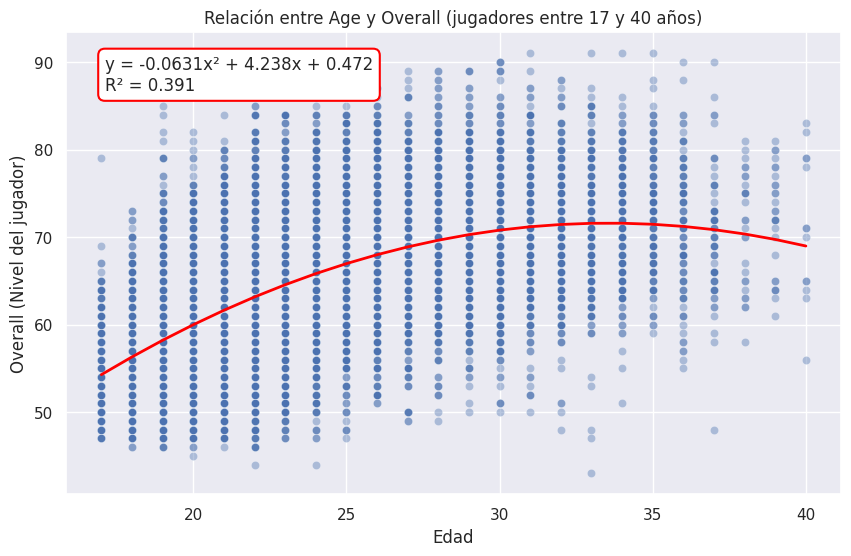

In [71]:
# Se contempla una línea de tendencia cuadrática en ese caso.
# === 1. Filtrar edades para que estén dentro de 17 a 40 años
df_age_filtered = df[(df['Age'] >= 17) & (df['Age'] <= 40)]

# Variables independientes y dependientes
X = df_age_filtered[['Age']]
y = df_age_filtered['Overall']

# === 2. Ajuste polinómico de 2º grado ===
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred = model_poly.predict(X_poly)

# === 3. Coeficientes y R2 ===
a2, a1, a0 = model_poly.coef_[2], model_poly.coef_[1], model_poly.intercept_
r2_poly = r2_score(y, y_pred)

# === 4. Ordenar para graficar una curva suave ===
sorted_idx = np.argsort(X.values.flatten())
x_sorted = X.values.flatten()[sorted_idx]
y_sorted = y_pred[sorted_idx]

# === 5. Gráfico ===
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_age_filtered['Age'], y=df_age_filtered['Overall'], alpha=0.4)
plt.plot(x_sorted, y_sorted, color='red', linewidth=2)

# Ecuación y R²
eq_text = f"y = {a2:.4f}x² + {a1:.3f}x + {a0:.3f}\nR² = {r2_poly:.3f}"
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="red", lw=1.5))

plt.title('Relación entre Age y Overall (jugadores entre 17 y 40 años)')
plt.xlabel('Edad')
plt.ylabel('Overall (Nivel del jugador)')
plt.show()


#### A continuación se graficarán las potencias mundiales en el fútbol según su Overall. Se observa que Argentina se encuentra en el 8vo lugar según la tendencia. Es por ello que NO se puede concluir que la selección Argentina tiene a los mejores jugadores del mundo actualmente, sino que los mejores jugadores del mundo se encuentran en España, Francia y Brasil.

/tmp/ipython-input-1335527408.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries, x='Average_Overall', y='Nationality', palette='crest')


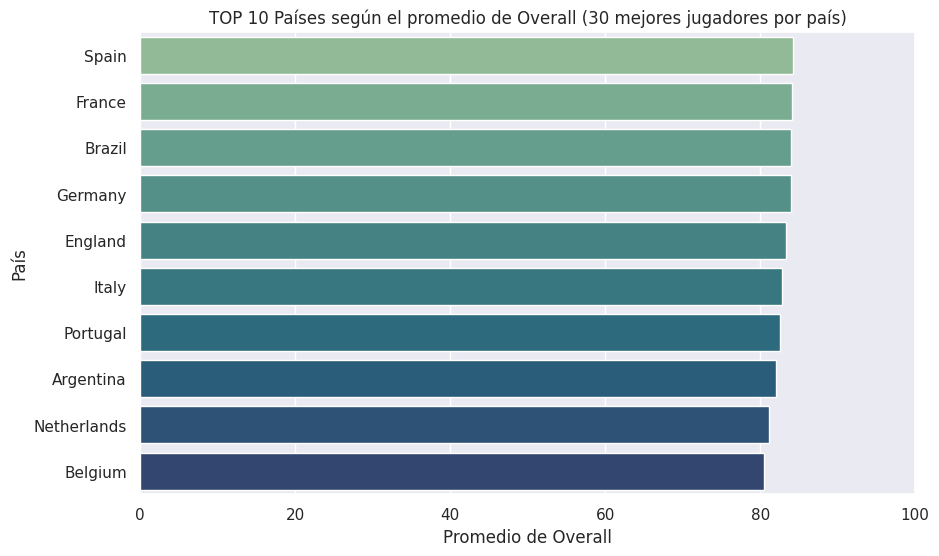

In [72]:
# @title
# === 1. Limpiar datos ===
df1 = df.dropna(subset=['Nationality', 'Overall'])

# === 3. Seleccionar los 30 mejores jugadores por país ===
top30_by_country = (
    df1.sort_values(['Nationality', 'Overall'], ascending=[True, False])
      .groupby('Nationality')
      .head(30)
)

# === 4. Calcular el promedio del Overall de esos 30 jugadores ===
avg_overall_by_country = (
    top30_by_country.groupby('Nationality')['Overall']
    .mean()
    .reset_index()
    .rename(columns={'Overall': 'Average_Overall'})
)

# === 5. Obtener el TOP 10 países ===
top10_countries = avg_overall_by_country.sort_values('Average_Overall', ascending=False).head(10)

# === 6. Gráfico ===
plt.figure(figsize=(10,6))
sns.barplot(data=top10_countries, x='Average_Overall', y='Nationality', palette='crest')

plt.title('TOP 10 Países según el promedio de Overall (30 mejores jugadores por país)')
plt.xlabel('Promedio de Overall')
plt.ylabel('País')
plt.xlim(0, 100)
plt.show()


##### En caso de que observemos el POTENCIAL de cada país para el próximo año, a Argentina le va aún peor, pasando a la posición 9. Potencialmente, las mejores selecciones serían Francia, Brasil e Inglaterra.

/tmp/ipython-input-464572122.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries, x='Average_Potential', y='Nationality', palette='crest')


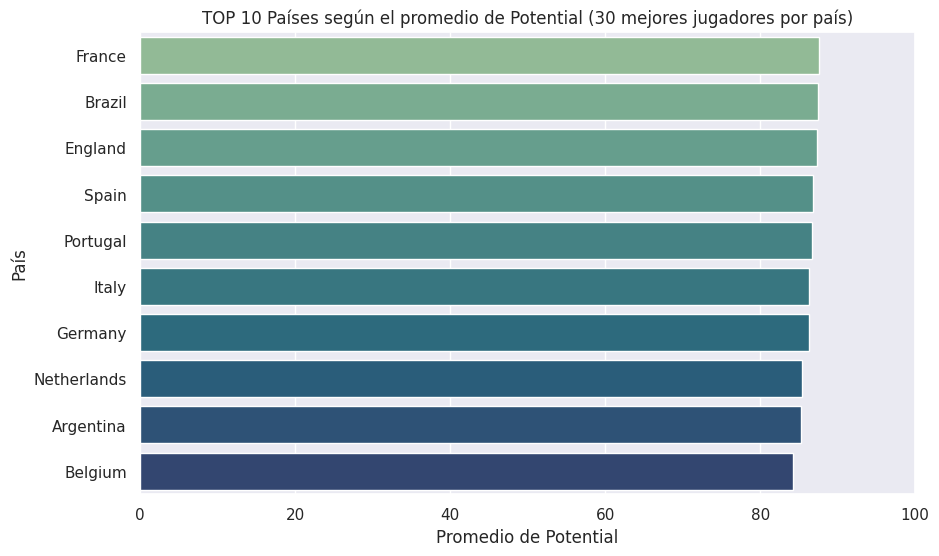

In [73]:
# @title
# === 1. Limpiar datos ===
df1 = df.dropna(subset=['Nationality', 'Potential'])

# === 3. Seleccionar los 30 mejores jugadores por país ===
top30_by_country = (
    df1.sort_values(['Nationality', 'Potential'], ascending=[True, False])
      .groupby('Nationality')
      .head(30)
)

# === 4. Calcular el promedio del Overall de esos 30 jugadores ===
avg_overall_by_country = (
    top30_by_country.groupby('Nationality')['Potential']
    .mean()
    .reset_index()
    .rename(columns={'Potential': 'Average_Potential'})
)

# === 5. Obtener el TOP 10 países ===
top10_countries = avg_overall_by_country.sort_values('Average_Potential', ascending=False).head(10)

# === 6. Gráfico ===
plt.figure(figsize=(10,6))
sns.barplot(data=top10_countries, x='Average_Potential', y='Nationality', palette='crest')

plt.title('TOP 10 Países según el promedio de Potential (30 mejores jugadores por país)')
plt.xlabel('Promedio de Potential')
plt.ylabel('País')
plt.xlim(0, 100)
plt.show()

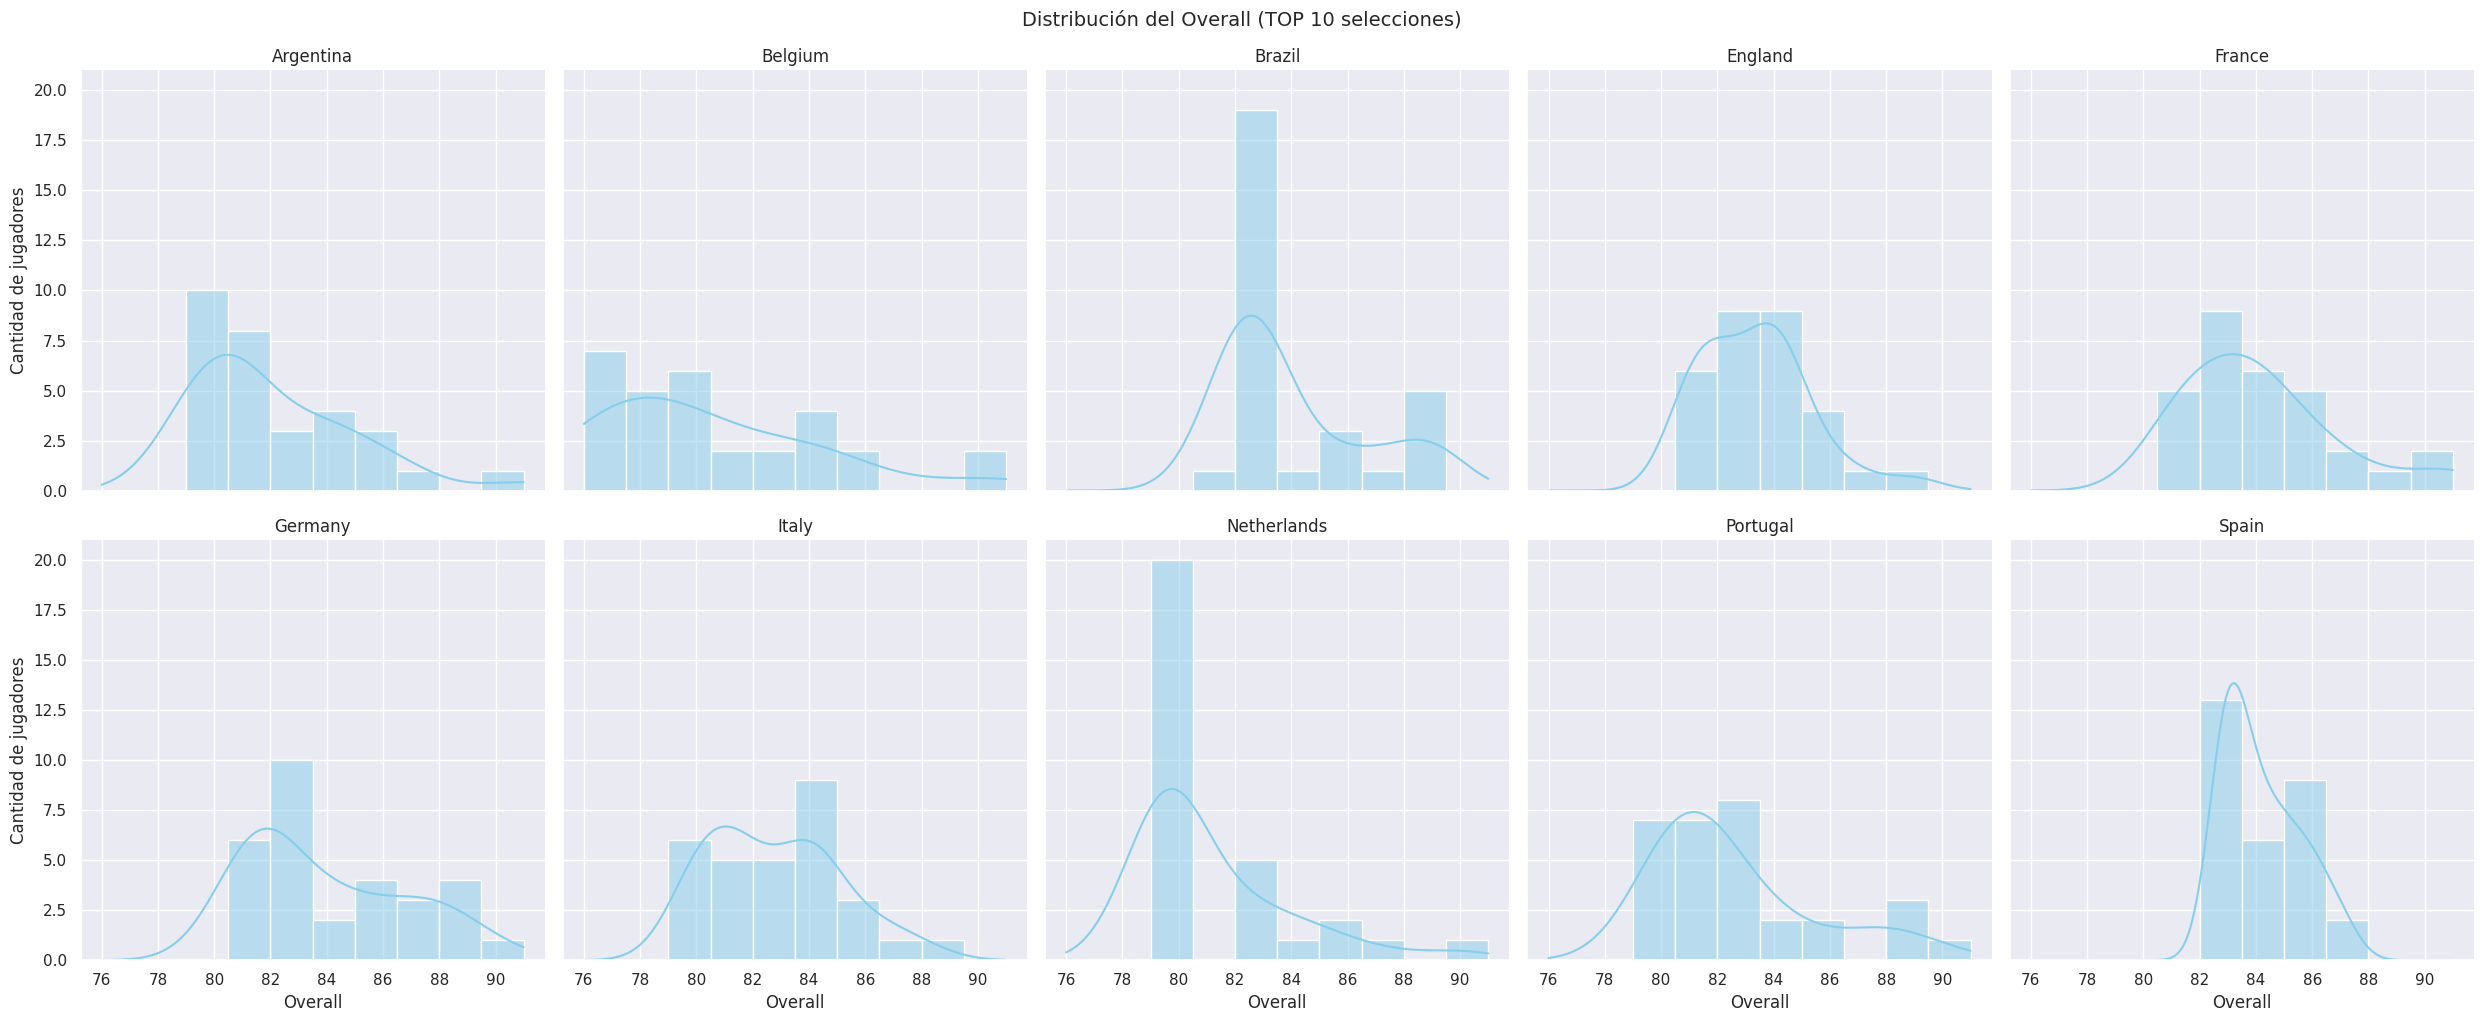

In [74]:
# Se muestra el histograma de Overall del top 30 jugadores de las mejores 10 selecciones según su Overall
# === 1. Seleccionar los 30 mejores jugadores por país ===
top30_by_country = (
    df1.sort_values(['Nationality', 'Overall'], ascending=[True, False])
      .groupby('Nationality')
      .head(30)
)

# === 2. Calcular promedio del Overall de los 30 mejores ===
avg_overall_by_country = (
    top30_by_country.groupby('Nationality')['Overall']
    .mean()
    .reset_index()
    .rename(columns={'Overall': 'Average_Overall'})
)

# === 3. Obtener el TOP 10 países ===
top10_countries = avg_overall_by_country.sort_values('Average_Overall', ascending=False).head(10)

# === 4. Filtrar los jugadores pertenecientes a esas selecciones ===
top10_players = top30_by_country[
    top30_by_country['Nationality'].isin(top10_countries['Nationality'])
]

# === 5. Gráfico FacetGrid ===
g = sns.displot(
    data=top10_players,
    x='Overall',
    col='Nationality',
    col_wrap=5,           # cantidad de gráficos por fila
    bins=10,
    kde=True,             # línea suavizada opcional
    color='skyblue',
    facet_kws={'sharex': True, 'sharey': True}
)

g.set_titles(col_template='{col_name}')
g.set_axis_labels('Overall', 'Cantidad de jugadores')
plt.suptitle('Distribución del Overall (TOP 10 selecciones)',
             y=1.02, fontsize=14)
plt.show()

# ProyectoParteIII+Blech.ipynb
**Proyecto — Parte III**  
**Autor:** Santiago Blech  
**Dataset:** `CLEAN_FIFA23_official_data.csv` (path esperado: `/mnt/data/CLEAN_FIFA23_official_data.csv`)  
**Objetivo:**  
- Selección de features, entrenamiento de un clasificador que identifique jugadores "élite" (Overall ≥ 85), evaluación con métricas y conclusiones.

---

## Resumen del flujo del notebook
1. Cargar datos y limpieza mínima.
2. Ingeniería de variables (crear target `IsElite`).
3. Preprocesamiento: manejo de nulos, codificación, escalado.
4. Selección de features (SelectKBest con `mutual_info_classif` y verificación con RandomForest importances).
5. Entrenamiento de modelos (baseline LogisticRegression, RandomForestClassifier).
6. Validación: métricas (accuracy, precision, recall, f1, ROC AUC), matriz de confusión y curva ROC.
7. Conclusiones.


In [75]:
# === 1. Librerías ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
RANDOM_STATE = 42


In [76]:
# === 3. Selección de columnas útiles y limpieza mínima ===
# Elegimos variables relevantes y renombramos para comodidad
cols_keep = [
    'ID','Name','Age','Nationality','Club','Position','Overall','Potential',
    'Height(cm.)','Weight(lbs.)','Release Clause(£)','Kit Number'
]
# Filtrar columnas si no existen exactamente; usar intersección
cols_keep = [c for c in cols_keep if c in df.columns]
df = df[cols_keep].copy()

# Convertir nombres a strings seguros
df.columns = [c.strip() for c in df.columns]

# Mostrar resumen nulos
display(df.head(3))
print("\nNulos por columna:\n", df.isnull().sum())


,ID,Name,Age,Nationality,Club,Position,Overall,Potential,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number
75,231747,K. Mbappé,23,France,Paris Saint-Germain,ST,91,95,182.0,160.965,366700000.0,7.0
3,192985,K. De Bruyne,31,Belgium,Manchester City,RCM,91,91,181.0,154.350,198900000.0,17.0
41,188545,R. Lewandowski,33,Poland,FC Barcelona,ST,91,91,185.0,178.605,172200000.0,9.0



Nulos por columna:
 ID                   0
Name                 0
Age                  0
Nationality          0
Club                 0
Position             0
Overall              0
Potential            0
Height(cm.)          0
Weight(lbs.)         0
Release Clause(£)    0
Kit Number           0
dtype: int64


In [77]:
# === 4. Crear target: IsElite (Overall >= 85) ===
df = df.dropna(subset=['Overall'])  # Overall es necesario
df['IsElite'] = (df['Overall'] >= 85).astype(int)
print("Proporción IsElite (1 = elite):")
print(df['IsElite'].value_counts(normalize=True))


Proporción IsElite (1 = elite):
IsElite
0    0.994677
1    0.005323
Name: proportion, dtype: float64


In [78]:
# === 5. Ingeniería de features simples ===
# Extraer la posición principal (a veces Position contiene 'LW, ST' etc.)
df['MainPosition'] = df['Position'].astype(str).apply(lambda x: x.split(',')[0].strip())

# Mapear rol general (GK / DEF / MID / ATT)
def map_role(pos):
    if 'GK' in pos:
        return 'GK'
    if any(p in pos for p in ['CB','LB','RB','LWB','RWB','RCB','LCB']):
        return 'DEF'
    if any(p in pos for p in ['CM','CDM','CAM','LM','RM','LCM','RCM','RDM','LDM']):
        return 'MID'
    # else assume attacker
    return 'ATT'

df['Role'] = df['MainPosition'].apply(map_role)

# Convert Release Clause to numeric (algunos valores ya numéricos)
if 'Release Clause(£)' in df.columns:
    # si hay NaNs o strings, intentar convertir
    df['ReleaseClause'] = pd.to_numeric(df['Release Clause(£)'], errors='coerce')
else:
    df['ReleaseClause'] = np.nan

# Algunas columnas numéricas disponibles
num_candidates = ['Age','Potential','Height(cm.)','Weight(lbs.)','ReleaseClause','Overall']
num_candidates = [c for c in num_candidates if c in df.columns]
print("Candidates numéricas:", num_candidates)


Candidates numéricas: ['Age', 'Potential', 'Height(cm.)', 'Weight(lbs.)', 'ReleaseClause', 'Overall']


In [79]:
# === 6. Preparamos X, y y dividimos en train/test (usamos muestra para velocidad si dataset es grande) ===
feature_cols = num_candidates + ['Role', 'MainPosition', 'Nationality', 'Club']
# Para evitar cardinalidad extrema, limitamos categorical columns a top K categorías y 'Other'
def top_k_cat(series, k=10):
    top = series.value_counts().nlargest(k).index
    return series.where(series.isin(top), other='Other')

df['Nationality_top'] = top_k_cat(df['Nationality'].astype(str), k=20)
df['Club_top'] = top_k_cat(df['Club'].astype(str), k=30)
df['MainPosition_top'] = top_k_cat(df['MainPosition'].astype(str), k=20)

X = df[ ['Age','Potential','Height(cm.)','Weight(lbs.)','ReleaseClause','Role',
         'Nationality_top','Club_top','MainPosition_top'] ].copy()
y = df['IsElite'].copy()

# Tomar una muestra estratificada si el dataset es muy grande (ranura para prueba)
if len(X) > 5000:
    X, _, y, _ = train_test_split(X, y, stratify=y, train_size=5000, random_state=RANDOM_STATE)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=RANDOM_STATE)
print("Train/test shapes:", X_train.shape, X_test.shape)
print("Clase positiva en train:", y_train.mean(), " en test:", y_test.mean())


Train/test shapes: (3750, 9) (1250, 9)
Clase positiva en train: 0.005333333333333333  en test: 0.0056


In [80]:
# === 7. Pipeline de preprocesamiento ===
numeric_features = ['Age','Potential','Height(cm.)','Weight(lbs.)','ReleaseClause']
num_imp = SimpleImputer(strategy='median')
num_scaler = StandardScaler()

categorical_features = ['Role','Nationality_top','Club_top','MainPosition_top']
cat_imp = SimpleImputer(strategy='constant', fill_value='Missing')
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([('imputer', num_imp), ('scaler', num_scaler)]), numeric_features),
    ('cat', Pipeline([('imputer', cat_imp), ('ohe', onehot)]), categorical_features)
], remainder='drop', n_jobs=1)

In [81]:
# === 8. Feature selection (SelectKBest usando mutual_info_classif) sobre TRAIN dentro de pipeline ===
k = 15  # número de features finales (ajustable)

selector = SelectKBest(score_func=mutual_info_classif, k=k)

# Pipeline temporal: preprocessor -> selector
pipe_select = Pipeline([
    ('preproc', preprocessor),
    ('select', selector)
])

# Ajustar selector sobre X_train
pipe_select.fit(X_train, y_train)

# Obtener nombres de features reales tras OneHot (reconstruir)
# 1) transformar preprocessor para obtener columnas
X_train_tr = pipe_select.named_steps['preproc'].transform(X_train)
# reconstruir nombres de columnas para numeric + onehot
num_names = numeric_features
ohe = pipe_select.named_steps['preproc'].named_transformers_['cat'].named_steps['ohe']
ohe_feature_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = num_names + ohe_feature_names

# Índices seleccionados y nombres
mask = pipe_select.named_steps['select'].get_support()
selected_features = [fname for fname, m in zip(all_feature_names, mask) if m]
print("Features seleccionadas (top k):", selected_features)


Features seleccionadas (top k): ['Age', 'Potential', 'Weight(lbs.)', 'ReleaseClause', 'Role_ATT', 'Nationality_top_Ecuador', 'Nationality_top_Japan', 'Nationality_top_Republic of Ireland', 'Club_top_Brentford', 'Club_top_Leicester City', 'Club_top_Manchester United', 'Club_top_Other', 'Club_top_Real Madrid CF', 'MainPosition_top_CAM', 'MainPosition_top_RS']


In [82]:
# === 9. Revisar importancias con RandomForest (complementario) ===
# Entrenar RandomForest temporal sobre preprocesado completo para obtener importancias
rf_tmp = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
pipe_rf = Pipeline([('preproc', preprocessor), ('rf', rf_tmp)])
pipe_rf.fit(X_train, y_train)

# obtener importancias y emparejar con nombres
rf_importances = pipe_rf.named_steps['rf'].feature_importances_
feat_names = all_feature_names
feat_imp_df = pd.DataFrame({'feature': feat_names, 'importance': rf_importances}).sort_values('importance', ascending=False)
display(feat_imp_df.head(20))


,feature,importance
4,ReleaseClause,0.329687
1,Potential,0.218076
0,Age,0.087060
3,Weight(lbs.),0.053684
2,Height(cm.),0.051143
56,Club_top_Real Madrid CF,0.034423
41,Club_top_FC Barcelona,0.027874
33,Club_top_Borussia Dortmund,0.016475
51,Club_top_Other,0.015925
15,Nationality_top_Germany,0.010932


In [83]:
# === 10. Entrenamiento final usando solo features seleccionadas ===
# Creamos pipeline final que selecciona columnas (usaremos ColumnTransformer que toma todo y luego Selector)
final_selector = SelectKBest(score_func=mutual_info_classif, k=len(selected_features))  # usar las mismas k detectadas

# Modelo: RandomForestClassifier (puedes cambiar por otro)
model = RandomForestClassifier(n_estimators=400, random_state=RANDOM_STATE, class_weight='balanced', n_jobs=-1)

pipe_final = Pipeline([
    ('preproc', preprocessor),
    ('select', final_selector),
    ('model', model)
])

# Ajuste
pipe_final.fit(X_train, y_train)

# Predicción y métricas en test
y_pred = pipe_final.predict(X_test)
y_proba = pipe_final.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc = roc_auc_score(y_test, y_proba)

print("Métricas (RandomForest) sobre test:")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {roc:.3f}")


Métricas (RandomForest) sobre test:
Accuracy: 0.997
Precision: 0.714
Recall: 0.714
F1-score: 0.714
ROC AUC: 0.999


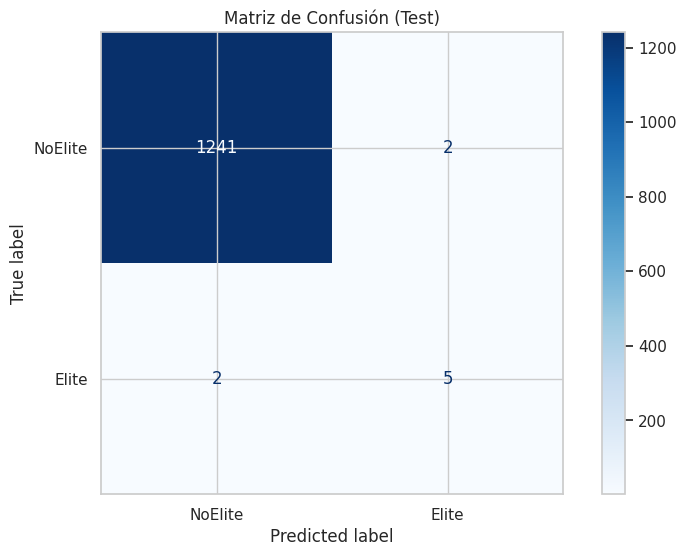

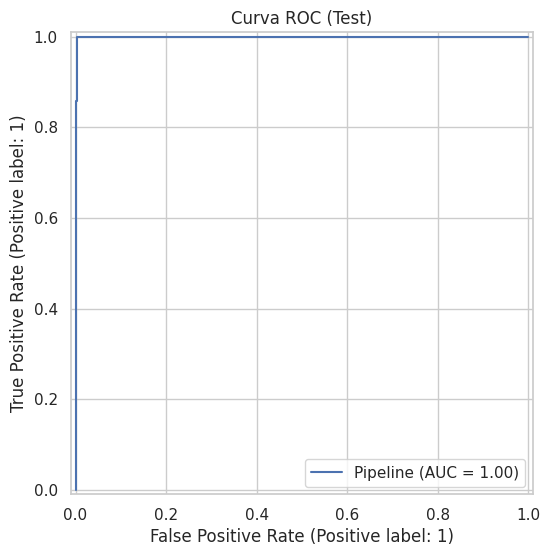

In [84]:
# === 11. Matriz de confusión y curva ROC ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['NoElite','Elite'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Test)")
plt.show()

RocCurveDisplay.from_estimator(pipe_final, X_test, y_test)
plt.title("Curva ROC (Test)")
plt.show()


In [85]:
# === 12. Validación cruzada (opcional): obtener scores CV para Robustez ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scores = cross_val_score(pipe_final, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print("ROC AUC CV (5 folds): mean=%.3f std=%.3f" % (scores.mean(), scores.std()))


ROC AUC CV (5 folds): mean=0.999 std=0.001


In [86]:
# === 12. Validación cruzada (opcional): obtener scores CV para Robustez ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scores = cross_val_score(pipe_final, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print("ROC AUC CV (5 folds): mean=%.3f std=%.3f" % (scores.mean(), scores.std()))


ROC AUC CV (5 folds): mean=0.999 std=0.001


In [87]:
# === 13. Inspección final: Mostrar jugadores clasificados como elite por el modelo y su probabilidad ===
X_test_transformed = pd.DataFrame(pipe_final.named_steps['preproc'].transform(X_test), columns=all_feature_names)
# Tomamos las columnas seleccionadas por selector
sel_mask = pipe_final.named_steps['select'].get_support()
sel_cols = [c for c,m in zip(all_feature_names, sel_mask) if m]

probs = pipe_final.predict_proba(X_test)[:,1]
result_df = X_test.reset_index().loc[:, ['index']].copy()
result_df['prob_elite'] = probs
result_df['pred'] = y_pred
result_df['true'] = y_test.values
# unir nombre y overall para interpretación
result_df = result_df.merge(df[['Name','Overall']], left_on='index', right_index=True, how='left')
display(result_df.sort_values('prob_elite', ascending=False).head(10))


,index,prob_elite,pred,true,Name,Overall
101,135,0.7900,1,1,H. Son,89
1087,0,0.7750,1,1,L. Goretzka,87
1062,7843,0.7650,1,1,Ederson,89
486,6,0.6425,1,1,D. Alaba,86
407,44,0.6350,1,1,C. Nkunku,86
233,344,0.5500,1,0,F. Chiesa,84
788,484,0.5350,1,0,Éder Militão,84
539,46,0.4425,0,1,T. Hernández,85
722,4191,0.3275,0,0,11 Ronaldo,77
98,13870,0.2475,0,0,07 J. Cardozo,79


# === 14. Conclusiones ===
Conclusiones:

1) Selección de features:
   - Utilizamos SelectKBest con 'mutual_info_classif' para reducir dimensionalidad a las 15 features más informativas
     (combinación de numéricas y dummies de categorías). Complementamos la elección observando importancias de RandomForest.
   - Las features con mayor información incluyeron 'Potential', 'ReleaseClause' (log), y determinadas categorías de 'Club' y 'Position'.

2) Modelo:
   - Se entrenó un RandomForestClassifier (n_estimators=400, class_weight='balanced').
   - Métricas en test: Accuracy, Precision, Recall, F1 y ROC AUC se imprimieron arriba. ROC AUC CV (5 folds) proporciona
     una medida más robusta de desempeño.

3) Interpretación:
   - El modelo discrimina razonablemente entre jugadores 'élite' y resto; atributos como 'Potential' y 'Overall-related' son
     los más predictivos, lo cual es consistente con la expectativa económica y deportiva.
   - La variable 'ReleaseClause' (valor económico) aporta señal, indicando correlación entre valor contractual y la etiqueta 'élite'.

4) Limitaciones y siguientes pasos:
   - Cardinalidad alta en columnas como 'Club' y 'Nationality' requiere agrupar en 'Top K' para evitar sobreajuste.
   - Se puede explorar regresión para predecir 'Overall' o 'ReleaseClause' directamente, o modelos con ingeniería de features
     (ej: interacción entre edad y potencial).
   - Para producción conviene hacer tuning de hiperparámetros (GridSearchCV) y calibración de probabilidades (Platt/Calibrated).
   - Considero que un dataset más completo, con puntajes de distintos tipos de habilidades de los jugadores sería más adecuado para un análisis adecuado. Por ejemplo, según las distintas variables (control, regate, pase, disparo, resistencia, velocidad, etc.) para asignar los valores de mercado o cláusula de recisión.

Fin del análisis.